# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kamen'-na-obi
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | merizo village
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | gadzhiyevo
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | pesqueira
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | hammerfest
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | san pablo villa de mitla
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | ushua

Processing Record 39 of Set 4 | jabor
Processing Record 40 of Set 4 | vorkuta
Processing Record 41 of Set 4 | valparaiso
Processing Record 42 of Set 4 | tozkhurmato
Processing Record 43 of Set 4 | amahai
Processing Record 44 of Set 4 | massawa
Processing Record 45 of Set 4 | aasiaat
Processing Record 46 of Set 4 | talodi
Processing Record 47 of Set 4 | sovetskiy
Processing Record 48 of Set 4 | kolondieba
Processing Record 49 of Set 4 | kharkhorin
Processing Record 0 of Set 5 | canton
Processing Record 1 of Set 5 | constantia
Processing Record 2 of Set 5 | ingeniero jacobacci
Processing Record 3 of Set 5 | ghat
Processing Record 4 of Set 5 | pemangkat
Processing Record 5 of Set 5 | champerico
Processing Record 6 of Set 5 | kapa'a
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | barnard castle
Processing Record 9 of Set 5 | kununurra
Processing Record 10 of Set 5 | fort-shevchenko
Processing Record 11 of Set 5 | zuyevka
Processing Record 12 of Set 5 | prince rupert


City not found. Skipping...
Processing Record 32 of Set 8 | minacu
City not found. Skipping...
Processing Record 33 of Set 8 | al hufuf
Processing Record 34 of Set 8 | la passe
Processing Record 35 of Set 8 | key west
Processing Record 36 of Set 8 | corral de bustos
Processing Record 37 of Set 8 | baruun-urt
Processing Record 38 of Set 8 | ishigaki
Processing Record 39 of Set 8 | cidade velha
Processing Record 40 of Set 8 | lincheng
Processing Record 41 of Set 8 | am djarass
City not found. Skipping...
Processing Record 42 of Set 8 | cill airne
Processing Record 43 of Set 8 | monett
Processing Record 44 of Set 8 | leer
Processing Record 45 of Set 8 | zhytkavichy
Processing Record 46 of Set 8 | tomohon
Processing Record 47 of Set 8 | tobol'sk
Processing Record 48 of Set 8 | krasnyy chikoy
Processing Record 49 of Set 8 | aldan
Processing Record 0 of Set 9 | amboanjo
Processing Record 1 of Set 9 | dhrangadhra
Processing Record 2 of Set 9 | utrik
Processing Record 3 of Set 9 | yanam
Proces

City not found. Skipping...
Processing Record 19 of Set 12 | gremyachevo
Processing Record 20 of Set 12 | tres lagoas
Processing Record 21 of Set 12 | sampit
Processing Record 22 of Set 12 | ahau
City not found. Skipping...
Processing Record 23 of Set 12 | tromso
Processing Record 24 of Set 12 | christiana
Processing Record 25 of Set 12 | wabag
Processing Record 26 of Set 12 | laiwu
Processing Record 27 of Set 12 | ulladulla
Processing Record 28 of Set 12 | parras de la fuente
Processing Record 29 of Set 12 | villa union
Processing Record 30 of Set 12 | palmer
Processing Record 31 of Set 12 | bathsheba
Processing Record 32 of Set 12 | acapulco de juarez
Processing Record 33 of Set 12 | basco
Processing Record 34 of Set 12 | kerikeri
Processing Record 35 of Set 12 | sao jose da coroa grande
Processing Record 36 of Set 12 | gallup
Processing Record 37 of Set 12 | don luan
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kamen'-na-obi,53.7884,81.3423,286.95,52,98,5.05,RU,1682632291
1,port-aux-francais,-49.3500,70.2167,279.09,71,83,12.30,TF,1682632291
2,georgetown,5.4112,100.3354,300.11,94,20,0.00,MY,1682632291
3,waitangi,-43.9535,-176.5597,285.83,76,98,1.34,NZ,1682632179
4,merizo village,13.2658,144.6691,300.92,92,15,8.63,GU,1682632291


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/citiesnew.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/citiesnew.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kamen'-na-obi,53.7884,81.3423,286.95,52,98,5.05,RU,1682632291
1,port-aux-francais,-49.3500,70.2167,279.09,71,83,12.30,TF,1682632291
2,georgetown,5.4112,100.3354,300.11,94,20,0.00,MY,1682632291
3,waitangi,-43.9535,-176.5597,285.83,76,98,1.34,NZ,1682632179
4,merizo village,13.2658,144.6691,300.92,92,15,8.63,GU,1682632291


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

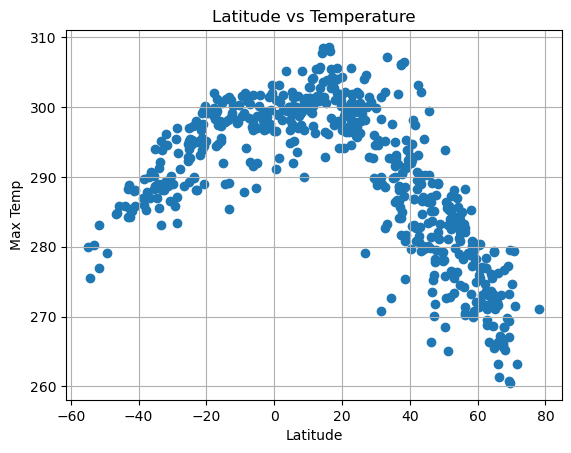

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

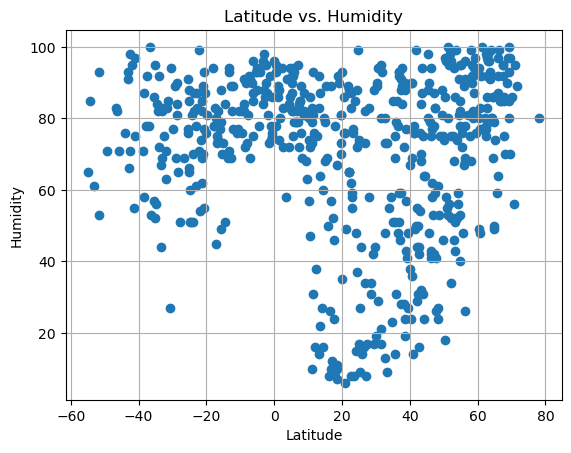

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
# Incorporate the other graph properties
plt.title(f"Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

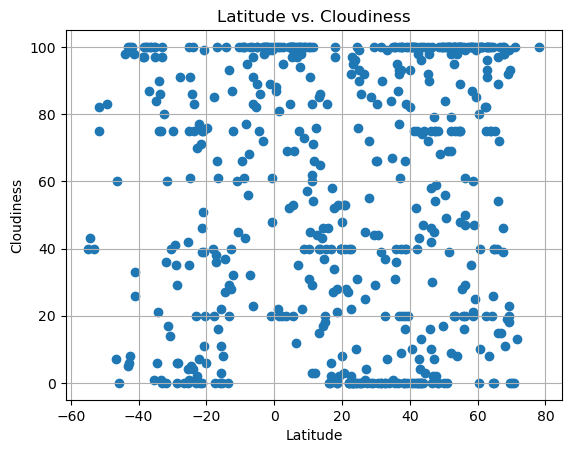

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

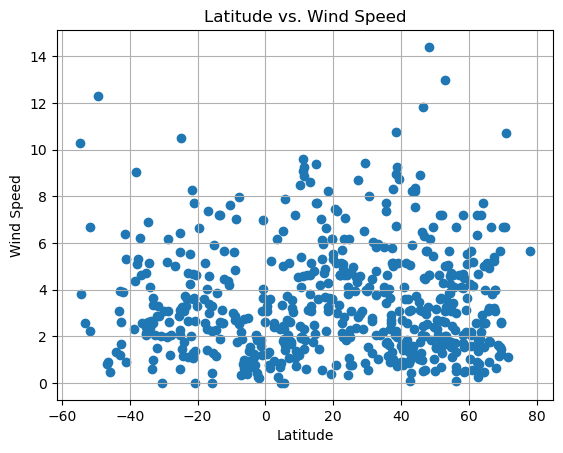

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# (slope,intercept, rvalue, pvalue,stderr))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kamen'-na-obi,53.7884,81.3423,286.95,52,98,5.05,RU,1682632291
2,georgetown,5.4112,100.3354,300.11,94,20,0.00,MY,1682632291
4,merizo village,13.2658,144.6691,300.92,92,15,8.63,GU,1682632291
5,iqaluit,63.7506,-68.5145,273.00,93,75,7.20,CA,1682632292
6,olonkinbyen,70.9221,-8.7187,271.51,95,100,10.72,SJ,1682632292


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,279.09,71,83,12.30,TF,1682632291
3,waitangi,-43.9535,-176.5597,285.83,76,98,1.34,NZ,1682632179
8,lebu,-37.6167,-73.6500,287.80,92,100,5.30,CL,1682632292
14,pesqueira,-8.3578,-36.6964,294.17,90,77,1.75,BR,1682632293
15,adamstown,-25.0660,-130.1015,297.01,65,100,2.27,PN,1682632178


###  Temperature vs. Latitude Linear Regression Plot

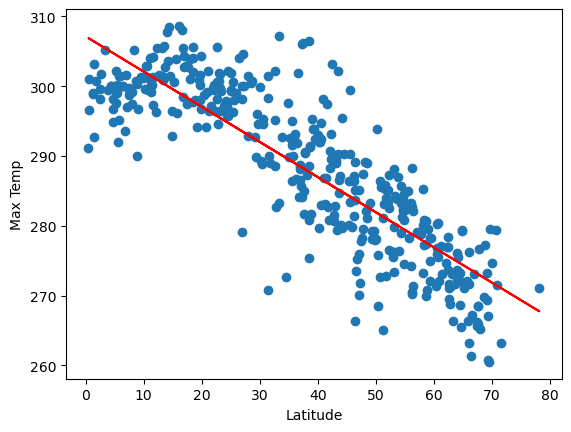

In [15]:
# Linear regression on Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)

regressvalues= xvalues* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(xvalues,yvalues)
plt.plot(xvalues, regressvalues, "r-")
plt.ylabel ("Max Temp")
plt.xlabel("Latitude")
plt.show()

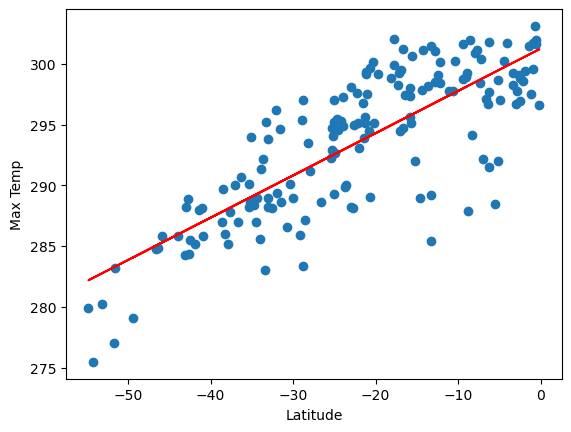

In [16]:
# Linear regression on Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)

regressvalues= xvalues* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regressvalues, "r-")
plt.ylabel ("Max Temp")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship: There is a positive correlation between max temp and latitude in the southern hemisphere. The inverce is true in the nothern hemisphere causing a negative correlation. 

### Humidity vs. Latitude Linear Regression Plot

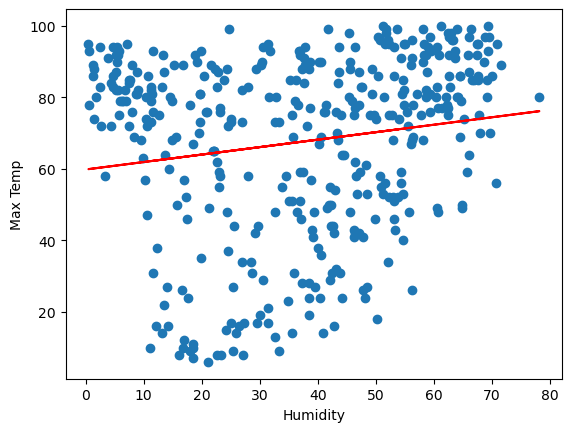

In [17]:
# Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)

regressvalues= xvalues* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(xvalues,yvalues)
plt.plot(xvalues, regressvalues, "r-")
plt.ylabel ("Max Temp")
plt.xlabel("Humidity")
plt.show()

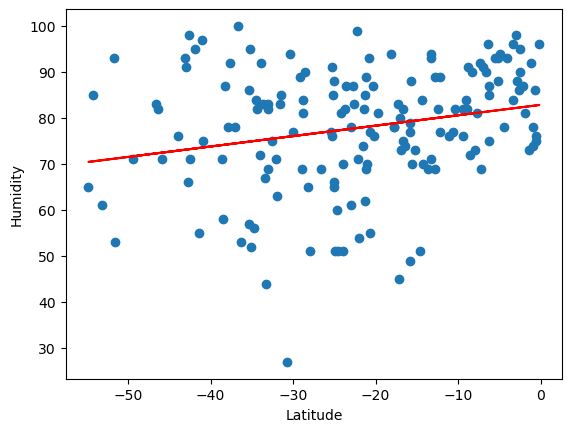

In [18]:
# Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)

regressvalues= xvalues* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regressvalues, "r-")
plt.ylabel ("Humidity")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship: It does not appear like there is a correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

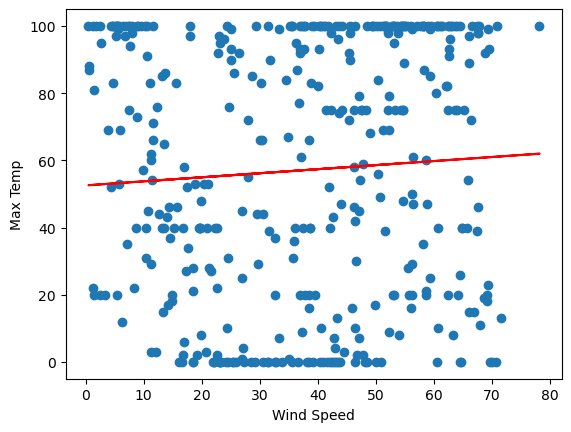

In [19]:
# Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)

regressvalues= xvalues* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(xvalues,yvalues)
plt.plot(xvalues, regressvalues, "r-")
plt.ylabel ("Max Temp")
plt.xlabel("Wind Speed")
plt.show()

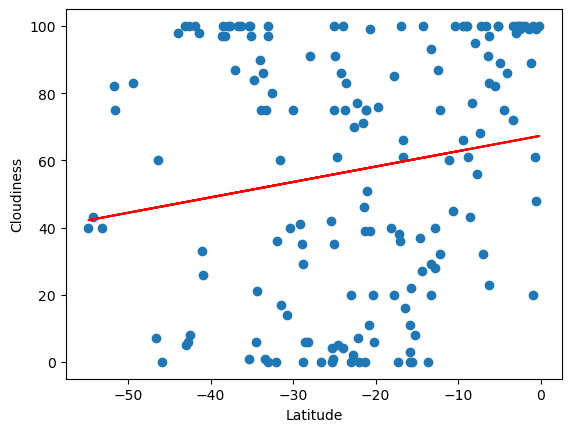

In [20]:
# Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)

regressvalues= xvalues* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regressvalues, "r-")
plt.ylabel ("Cloudiness")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship: There does not seem to be a corrolation between cloudiness and latitude in either hemisphere 

### Wind Speed vs. Latitude Linear Regression Plot

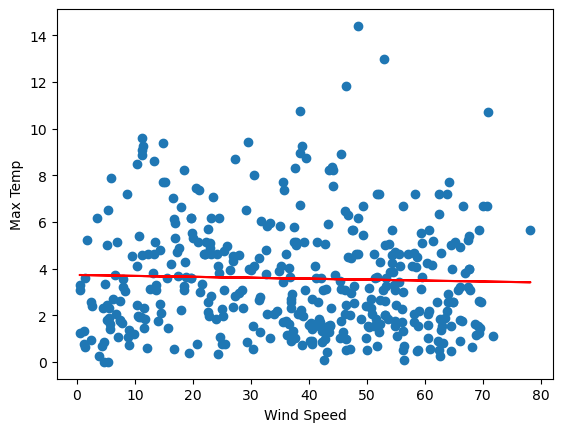

In [21]:
# Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)

regressvalues= xvalues* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(xvalues,yvalues)
plt.plot(xvalues, regressvalues, "r-")
plt.ylabel ("Max Temp")
plt.xlabel("Wind Speed")
plt.show()

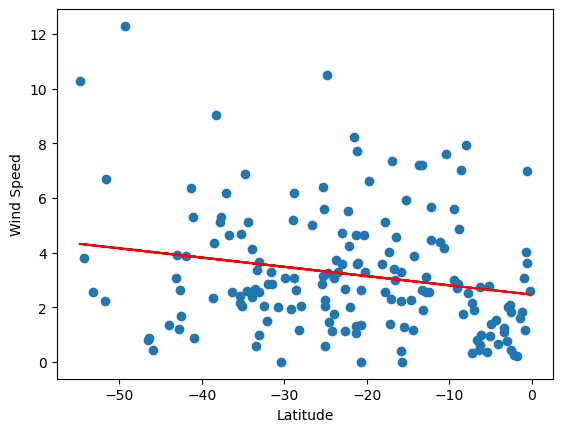

In [22]:
# Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)

regressvalues= xvalues* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regressvalues, "r-")
plt.ylabel ("Wind Speed")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship: There does not seem to be a correlation between windspeed and latitude in either hemisphere. 